## DAT_12_SF Midterm
____________________--

### About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 



Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

###Definitions of the attributes: 
_______________-

####48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

####6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

####1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

####1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

%matplotlib inline

In [2]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
spam_data = pd.read_csv("spambase.csv")
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
spam_data.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601,0.104553,0.305358,0,0.000,0.000,0.000,4.540
word_freq_address,4601,0.213015,1.290575,0,0.000,0.000,0.000,14.280
word_freq_all,4601,0.280656,0.504143,0,0.000,0.000,0.420,5.100
word_freq_3d,4601,0.065425,1.395151,0,0.000,0.000,0.000,42.810
word_freq_our,4601,0.312223,0.672513,0,0.000,0.000,0.380,10.000
word_freq_over,4601,0.095901,0.273824,0,0.000,0.000,0.000,5.880
word_freq_remove,4601,0.114208,0.391441,0,0.000,0.000,0.000,7.270
word_freq_internet,4601,0.105295,0.401071,0,0.000,0.000,0.000,11.110
word_freq_order,4601,0.090067,0.278616,0,0.000,0.000,0.000,5.260
word_freq_mail,4601,0.239413,0.644755,0,0.000,0.000,0.160,18.180


In [4]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other


In [5]:
print spam_data.is_spam.value_counts()
print "spam rate is {:.1f}%".format(spam_data.is_spam.sum() / float(spam_data.is_spam.count()) *100 )

0    2788
1    1813
dtype: int64
spam rate is 39.4%


In [6]:
spam_data.columns

Index([u'word_freq_make', u'word_freq_address', u'word_freq_all', u'word_freq_3d', u'word_freq_our', u'word_freq_over', u'word_freq_remove', u'word_freq_internet', u'word_freq_order', u'word_freq_mail', u'word_freq_receive', u'word_freq_will', u'word_freq_people', u'word_freq_report', u'word_freq_addresses', u'word_freq_free', u'word_freq_business', u'word_freq_email', u'word_freq_you', u'word_freq_credit', u'word_freq_your', u'word_freq_font', u'word_freq_000', u'word_freq_money', u'word_freq_hp', u'word_freq_hpl', u'word_freq_george', u'word_freq_650', u'word_freq_lab', u'word_freq_labs', u'word_freq_telnet', u'word_freq_857', u'word_freq_data', u'word_freq_415', u'word_freq_85', u'word_freq_technology', u'word_freq_1999', u'word_freq_parts', u'word_freq_pm', u'word_freq_direct', u'word_freq_cs', u'word_freq_meeting', u'word_freq_original', u'word_freq_project', u'word_freq_re', u'word_freq_edu', u'word_freq_table', u'word_freq_conference', u'char_freq_;', u'char_freq_(', u'char_freq

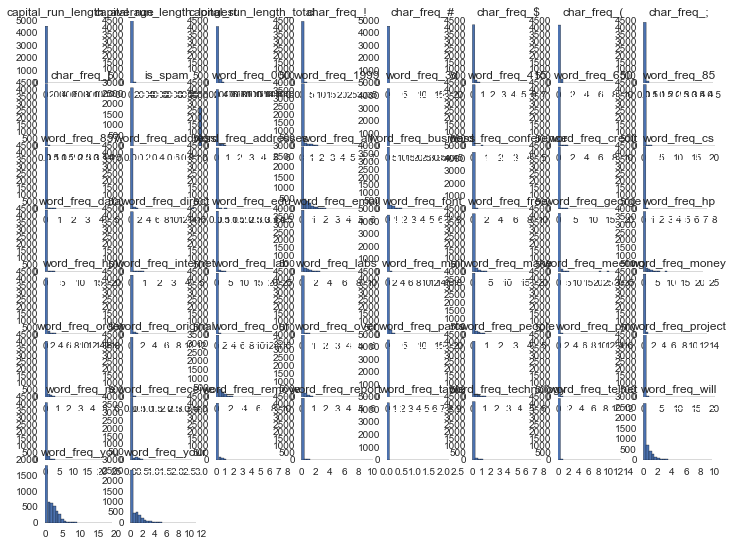

In [7]:
spam_data.hist(bins = 25, figsize = (12,9))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.001)

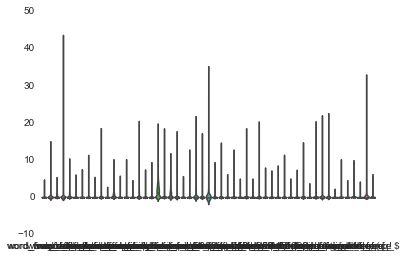

In [8]:
sns.violinplot(spam_data.iloc[:, 0:53])
# word frequency is very right-skewed

I want to compare word frequency between ham and spam. Didn't get rugplot to work, stripplot is not yet available, so hacking it with a looped scatterplot

In [9]:
# checking out how word frequency differs for spam vs ham
spam = spam_data[spam_data.is_spam == 1]
ham = spam_data[spam_data.is_spam == 0]

In [10]:
# # trying to make a rugplot for each of the columns, not working as intended

# i = 0
# fig, axes = plt.subplots(58, 1)

# for column in spam_data.iloc[:,0:53]:
     
#     sns.rugplot(spam_data[column], ax = axes[i, 0])
#     i += 1

In [11]:
# # Going to keep this handy as a reference for multi-subplot plots

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 20), sharey = True, sharex = True)

# for i, column in enumerate(spam.iloc[:, 0:53]):
#     ax1.scatter(spam[column], [i] * len(spam), alpha = 0.05, s = 10)
    
# ax1.yaxis.set_ticks(np.arange(0, 53, 1))
# ax1.set_xlim(0, 50)
# ax1.set_yticklabels(spam.iloc[:, 0:53].columns)
# ax1.set_title('Spam')

# for i, column in enumerate(ham.iloc[:, 0:53]):
#     ax2.scatter(ham[column], [i] * len(ham), alpha = 0.05, s = 10)
    
# ax2.yaxis.set_ticks(np.arange(0, 53, 1))
# ax2.set_xlim(0, 50)
# ax2.set_yticklabels(ham.iloc[:, 0:53].columns)
# ax1.set_title('Ham')

###Exercise 2: Build a simple logistic regression and visualize it

use the variable "capital_run_length_longest" to predict "is_spam"
How accurate is this single feature?

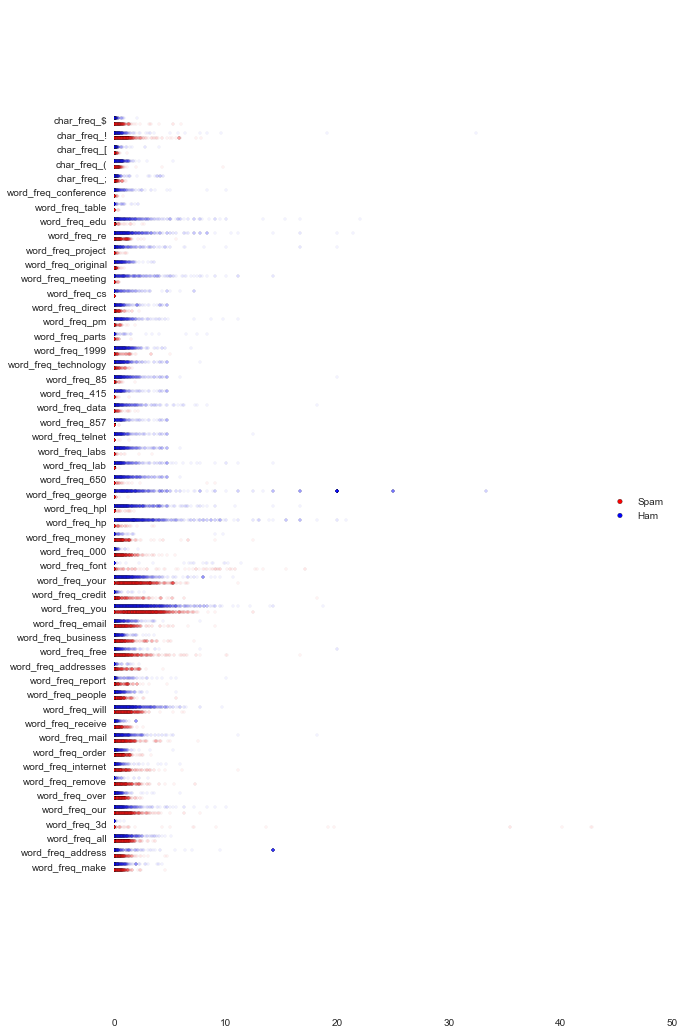

In [12]:
# trying to make a rugplot for each of the columns
from seaborn import plt

fig, ax1 = plt.subplots(1, 1, figsize = (10, 18))

for i, column in enumerate(spam.iloc[:, 0:53]):
    plt.scatter(spam[column], [i - 0.2] * len(spam), alpha = 0.05, s = 10, c = 'r')
    
for i, column in enumerate(ham.iloc[:, 0:53]):
    plt.scatter(ham[column], [i + 0.2] * len(ham), alpha = 0.05, s = 10, c = 'b')
    
plt.scatter(60, 0, c = 'r', label = 'Spam') # ugly hack to get my legend labels on
plt.scatter(60, 0, c = 'b', label = 'Ham')
ax1.yaxis.set_ticks(np.arange(0, 53, 1))
ax1.set_xlim(0, 50)
ax1.set_yticklabels(spam.iloc[:, 0:53].columns)
plt.legend(loc="right")

# The following doesn't work, stripplot only available for v0.6.0, and I don't want to get it working only for
# reader to have to install it
# sns.stripplot(x = spam_data[column], y = i, jitter = True)

In [13]:
from sklearn.linear_model import LogisticRegression

logit1 = LogisticRegression()
logit1.fit(spam_data.capital_run_length_longest.reshape(len(spam_data), 1), spam_data['is_spam'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [14]:
# testing/validating model on to the training data in order to get an 'accuracy' of classification for the model
# The training error is 1 minus this
logit1.score(spam_data.capital_run_length_longest.reshape(len(spam_data), 1), spam_data.is_spam)

0.72549445772658117

### Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [15]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(spam_data.iloc[:,0:57],
                                                    spam_data.is_spam,
                                                    test_size = 0.3,
                                                    random_state = 12)

print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(3220L, 57L) (1381L, 57L) (3220L,) (1381L,)


In [16]:
logit_all = LogisticRegression()
logit_all.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [17]:
print 'Accuracy on training data is {:.1f}%'.format(logit_all.score(X_train, y_train) * 100)
print 'Accuracy on test data is {:.1f}%'.format(logit_all.score(X_test, y_test) * 100)

Accuracy on training data is 92.8%
Accuracy on test data is 93.3%


###Exercise 4: Apply Crossvalidation to see how the model fares across different splits of your date

#### Use crossvalidation to score model

In [18]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(logit_all, X_train, y_train, cv = 3) # using 3 so over 1000 samples in each fold

In [19]:
from scipy import stats

print scores.mean(), stats.sem(scores)
print scores

# sum((scores - scores.mean())**2) ** 0.5 / (6 ** 0.5) weird that the sem is assuming n = 6

print 'Mean 3-fold cross-validation score is {:.1f}%'.format(scores.mean() * 100)

0.921743164856 0.00669299234937
[ 0.90875233  0.92544268  0.93103448]
Mean 3-fold cross-validation score is 92.2%


### Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
-Which model is more accurate?

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           n_neighbors=3, p=2, weights='uniform')

In [21]:
print 'Accuracy on test data is {0:.1f}% for logit, {1:.1f}% for knn'.format(logit_all.score(X_test, y_test) * 100, knn.score(X_test, y_test) * 100)

Accuracy on test data is 93.3% for logit, 78.3% for knn


In [22]:
scores_knn = cross_val_score(knn, X_train, y_train, cv = 3)
print scores_knn
print 'Mean 3-fold cross-validation score is {0:.1f}% for logit, {1:.1f}% for knn'.format(scores.mean() * 100, scores_knn.mean() * 100)

[ 0.79795158  0.79589935  0.78937558]
Mean 3-fold cross-validation score is 92.2% for logit, 79.4% for knn


Logistic Regression is more accurate.

### Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

In [23]:
coefs = pd.Series(logit_all.coef_[0], index = spam_data.iloc[:,0:57].columns)
coefs.sort(ascending = False)
coefs

char_freq_$                   4.122290
word_freq_000                 2.123733
word_freq_remove              1.947264
char_freq_#                   1.238931
word_freq_free                0.901559
word_freq_3d                  0.858657
word_freq_business            0.823062
word_freq_technology          0.798138
word_freq_our                 0.779068
word_freq_over                0.741484
word_freq_credit              0.725963
word_freq_addresses           0.581049
word_freq_order               0.513988
word_freq_internet            0.437466
word_freq_mail                0.381134
word_freq_font                0.317136
word_freq_money               0.314176
word_freq_your                0.308407
char_freq_!                   0.256751
word_freq_650                 0.248291
word_freq_report              0.214355
word_freq_email               0.121923
word_freq_all                 0.100324
word_freq_you                 0.069520
word_freq_1999                0.045617
capital_run_length_longes

I have sorted the influence of each feature in descending order -- '$' char frequency, '000' word frequency, 'remove' word frequency and '#' char frequency are the most influential.

Caveat that I don't have the confidence intervals for these coefficients (since I used sklearn, not statsmodels), so the most influential features might not actually be statistically significant.

### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [24]:
def plot_roc_curve(target_test, target_predicted_proba):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba, pos_label = 1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = {:.3f})'.format(roc_auc))
    
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specificity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

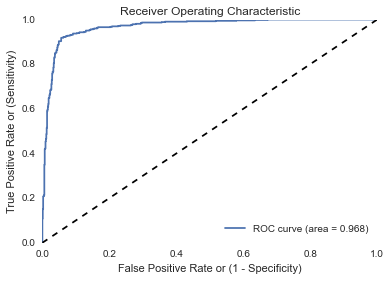

In [25]:
plot_roc_curve(y_test, logit_all.predict_proba(X_test)[:,1])

### Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [26]:
print 'Accuracy on test data is {:.1f}% using a 50% threshold'.format(logit_all.score(X_test, y_test) * 100)
print "spam rate is {:.1f}%".format(spam_data.is_spam.sum() / float(spam_data.is_spam.count()) *100 )

Accuracy on test data is 93.3% using a 50% threshold
spam rate is 39.4%


In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logit_all.predict_proba(X_test)[:,1])

roc_table = pd.DataFrame(np.column_stack((fpr.T, tpr.T, thresholds.T)), columns = ['fpr', 'tpr', 'thresholds'])
roc_table.head(n = 70)

,fpr,tpr,thresholds
0,0.00000,0.003802,1.000000
1,0.00000,0.005703,1.000000
2,0.00000,0.007605,1.000000
3,0.00000,0.009506,0.999999
4,0.00000,0.011407,0.999998
5,0.00000,0.013308,0.999998
6,0.00000,0.015209,0.999997
7,0.00000,0.017110,0.999996
8,0.00000,0.019011,0.999993
9,0.00000,0.020913,0.999991


In [28]:
roc_table_maxfpr = roc_table.groupby('fpr').max()
roc_table_minfpr = roc_table.groupby('fpr').min()
roc_table_final = pd.concat([roc_table_maxfpr.tpr, roc_table_minfpr.thresholds], axis = 1)
roc_table_final

,tpr,thresholds
fpr,,
0.000000,0.108365,9.996137e-01
0.001170,0.150190,9.988776e-01
0.002339,0.207224,9.972533e-01
0.003509,0.209125,9.969598e-01
0.004678,0.212928,9.964185e-01
0.005848,0.349810,9.852029e-01
0.007018,0.420152,9.706127e-01
0.008187,0.422053,9.704321e-01
0.009357,0.454373,9.623377e-01


In [29]:
roc_table_final['fpr'] = roc_table_final.index
roc_table_final = roc_table_final.drop('fpr', axis = 1)
roc_table_final = roc_table_final.reset_index()
roc_table_final.head()

,fpr,tpr,thresholds
0,0.000000,0.108365,0.999614
1,0.001170,0.150190,0.998878
2,0.002339,0.207224,0.997253
3,0.003509,0.209125,0.996960
4,0.004678,0.212928,0.996419


In [30]:
def slope(x, y, data, result):
    vals = []
    for i in np.arange(len(data)):
        if i == 0 or i == len(data) - 1:
            vals.append(np.nan)
        else:
            vals.append((data[y].iloc[i] - data[y].iloc[i-1])/
                        (data[x].iloc[i] - data[x].iloc[i-1]))
    
    new = pd.DataFrame(vals, columns = [result])
    return pd.concat([data, new], axis = 1)

In [31]:
roc_table_final2 = slope('fpr', 'tpr', roc_table_final, 'deriv1')
roc_table_final3 = slope('fpr', 'deriv1', roc_table_final2, 'deriv2')
roc_table_final3.head()

,fpr,tpr,thresholds,deriv1,deriv2
0,0.000000,0.108365,0.999614,NaN,NaN
1,0.001170,0.150190,0.998878,35.760456,NaN
2,0.002339,0.207224,0.997253,48.764259,11118.250951
3,0.003509,0.209125,0.996960,1.625475,-40303.659696
4,0.004678,0.212928,0.996419,3.250951,1389.781369


In [32]:
roc_table_final4 = roc_table_final3[roc_table_final3.tpr > 0.9]
roc_table_final4.sort(columns = ['deriv2']).head(n=10)

,fpr,tpr,thresholds,deriv1,deriv2
45,0.057310,0.918251,0.467582,0,-11118.250951
74,0.092398,0.937262,0.337863,0,-4169.344106
107,0.130994,0.950570,0.271598,0,-4169.344106
119,0.145029,0.956274,0.237876,0,-2779.562738
216,0.270175,0.979087,0.112470,0,-2779.562738
136,0.164912,0.963878,0.208208,0,-2779.562738
43,0.054971,0.903042,0.490095,0,-2223.650190
180,0.228070,0.971483,0.175754,0,-1389.781369
239,0.298246,0.986692,0.077186,0,-1389.781369
139,0.168421,0.965779,0.202974,0,-1389.781369


In [33]:
alt = roc_table_final4.loc[43]
alt

fpr              0.054971
tpr              0.903042
thresholds       0.490095
deriv1           0.000000
deriv2       -2223.650190
Name: 43, dtype: float64

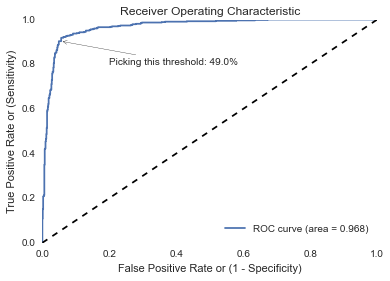

In [34]:
plot_roc_curve(y_test, logit_all.predict_proba(X_test)[:,1])

annotation_kw = {'xycoords': 'data', 'textcoords': 'data',
                 'arrowprops': {'arrowstyle': '->', 'connectionstyle': 'arc'}}

plt.annotate(s = 'Picking this threshold: {:.1f}%'.format(float(alt.thresholds) * 100),
             xy = (alt.fpr,alt.tpr),
             xytext = (0.2,0.8),
             **annotation_kw)

In [35]:
# alt = alt.thresholds

# 48% is too close, let's try outlandish thresholds by setting the alt parameter
# Either use outlandish parameters, the population spam rate (40%) or my identified alt-thresholds (48%).

alt = 0.9

probs = logit_all.predict_proba(X_test)[:,1]
v = np.vectorize(lambda x: 1 if x > float(alt) else 0)
pred_alt = v(probs)

correct = 0
for i, j in zip(pred_alt, y_test):
    if i == j:
        correct += 1
    else:
        continue

print 'The accuracy on the test set using a {:.1f}% threshold is {:.1f}%'.format(alt * 100,
                                                                                 float(correct) / len(y_test) * 100 )

The accuracy on the test set using a 90.0% threshold is 83.6%


###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea? 

###Pros
 - To ('hackily') adjust for class imbalance. If the case I'm predicting for happens very rarely (or too often), my predictions would center around it
 - To adjust for cases where the error term is not a Bernoulli distribution, since the MLE for logistic regression assumes that.
 - As seen on the ROC curve, the point I might want to pick is where the curve starts bowing, and that is not necessarily 50%.
 - More generally, I might value/tolerate true positives and false positives differently, and might want to deliberately pick a threshold that catches more/less spam while worrying less about wrongly classifying more ham/spam.
 
###Cons
 - Cases where the above four are not true

###Bonus: Apply PCA to the features and visualize the data in two dimensions: 

In [36]:
# Checking to see if 2 dimensions is suitable first

from sklearn.decomposition import PCA
pca = PCA(whiten=True)
pca.fit(spam_data.iloc[:, 0:57])

PCA(copy=True, n_components=None, whiten=True)

In [37]:
def pca_summary(prcomp):
    return pd.DataFrame([np.sqrt(prcomp.explained_variance_), 
              prcomp.explained_variance_ratio_, 
              prcomp.explained_variance_ratio_.cumsum()],
             index = ["Standard deviation", "Proportion of Variance", "Cumulative Proportion"], 
             columns = (map("PC{}".format, range(1, len(prcomp.components_)+1))))

In [38]:
pca_summary(pca).T

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,613.941082,9.270270e-01,0.927027
PC2,169.957786,7.104297e-02,0.998070
PC3,27.379691,1.843725e-03,0.999914
PC4,3.377555,2.805717e-05,0.999942
PC5,2.033298,1.016812e-05,0.999952
PC6,1.620511,6.458668e-06,0.999958
PC7,1.395059,4.786566e-06,0.999963
PC8,1.279552,4.026749e-06,0.999967
PC9,1.155140,3.281768e-06,0.999970
PC10,1.031527,2.616978e-06,0.999973


Just 2 principal factors needed! Albeit without checking for scaling first (potentially problematic for capital_run_length features)

In [42]:
pca2 = PCA(n_components=2, whiten=True)
pca2.fit(spam_data.iloc[:,0:57])
X_pca2 = pca2.transform(spam_data.iloc[:,0:57])

In [43]:
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle('brgcmykw')
    target_ids = range(len(target_names))
    plt.figure(figsize = (16, 9))
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   facecolors = 'none', edgecolors = c, label=label)
    plt.legend()

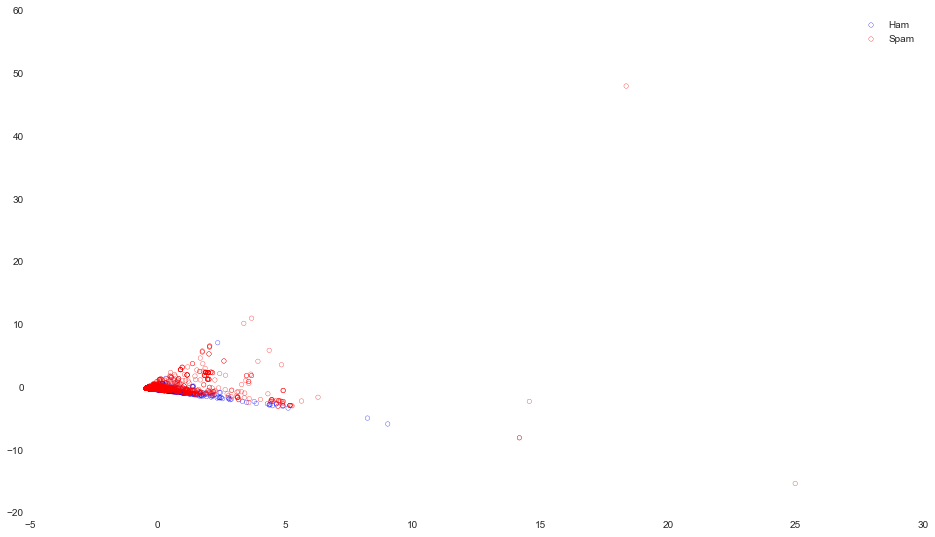

In [44]:
plot_PCA_2D(X_pca2, spam_data.is_spam.values, ['Ham', 'Spam'])

Heavy dimensionality reduction with PCA because word frequency goes together, but 2-component PCA does not look like it helps with classification, since blue and red are hard to distinguish from the plot. Performance might improve if I scale capital_run_length (every feature, in fact I should). Heck let's do it.

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
                   (('scaler', StandardScaler()),
                    ('pca2', PCA(n_components = 2, whiten = True)))
                   )
                    
pipeline.fit(spam_data.iloc[:,0:57].copy())

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca2', PCA(copy=True, n_components=2, whiten=True))])

In [46]:
X_scaled_PCA2 = pipeline.transform(spam_data.iloc[:,0:57].copy())

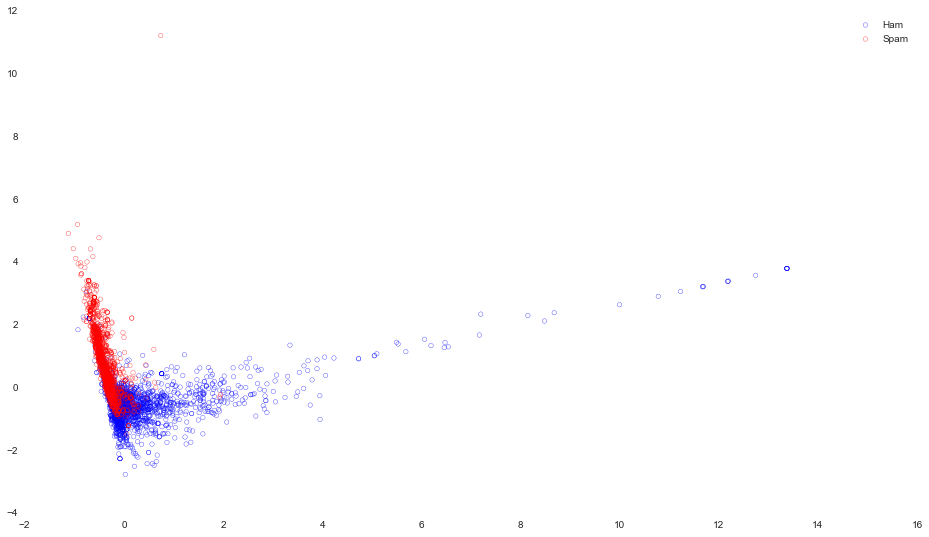

In [47]:
plot_PCA_2D(X_scaled_PCA2, spam_data.is_spam.values, ['Ham', 'Spam'])

Looks better!

In [48]:
# checking if the scaling looks right

from sklearn.preprocessing import scale

X_scaled = scale(spam_data.iloc[:,0:57])
X_scaled_df = pd.DataFrame(X_scaled, columns = spam_data.columns[0:57])
X_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601,1.853187e-17,1.000109,-0.342434,-0.342434,-0.342434,-0.342434,14.526998
word_freq_address,4601,2.779780e-17,1.000109,-0.165072,-0.165072,-0.165072,-0.165072,10.900965
word_freq_all,4601,2.470916e-17,1.000109,-0.556761,-0.556761,-0.556761,0.276427,9.560519
word_freq_3d,4601,0.000000e+00,1.000109,-0.046900,-0.046900,-0.046900,-0.046900,30.641278
word_freq_our,4601,4.941832e-17,1.000109,-0.464314,-0.464314,-0.464314,0.100792,14.406908
word_freq_over,4601,3.706374e-17,1.000109,-0.350266,-0.350266,-0.350266,-0.350266,21.125709
word_freq_remove,4601,-2.470916e-17,1.000109,-0.291794,-0.291794,-0.291794,-0.291794,18.282611
word_freq_internet,4601,0.000000e+00,1.000109,-0.262562,-0.262562,-0.262562,-0.262562,27.441249
word_freq_order,4601,2.470916e-17,1.000109,-0.323302,-0.323302,-0.323302,-0.323302,18.557789
word_freq_mail,4601,1.235458e-17,1.000109,-0.371364,-0.371364,-0.371364,-0.123181,27.828440


In [49]:
X_scaler = pipeline.steps[0][1].transform(spam_data.iloc[:,0:57].copy())

X_scaler_df = pd.DataFrame(X_scaler, columns = spam_data.columns[0:57])
X_scaler_df.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601,1.853187e-17,1.000109,-0.342434,-0.342434,-0.342434,-0.342434,14.526998
word_freq_address,4601,2.779780e-17,1.000109,-0.165072,-0.165072,-0.165072,-0.165072,10.900965
word_freq_all,4601,2.470916e-17,1.000109,-0.556761,-0.556761,-0.556761,0.276427,9.560519
word_freq_3d,4601,0.000000e+00,1.000109,-0.046900,-0.046900,-0.046900,-0.046900,30.641278
word_freq_our,4601,4.941832e-17,1.000109,-0.464314,-0.464314,-0.464314,0.100792,14.406908
word_freq_over,4601,3.706374e-17,1.000109,-0.350266,-0.350266,-0.350266,-0.350266,21.125709
word_freq_remove,4601,-2.470916e-17,1.000109,-0.291794,-0.291794,-0.291794,-0.291794,18.282611
word_freq_internet,4601,0.000000e+00,1.000109,-0.262562,-0.262562,-0.262562,-0.262562,27.441249
word_freq_order,4601,2.470916e-17,1.000109,-0.323302,-0.323302,-0.323302,-0.323302,18.557789
word_freq_mail,4601,1.235458e-17,1.000109,-0.371364,-0.371364,-0.371364,-0.123181,27.828440
